In [64]:
#import the Python libraries required for data handling (pandas, numpy) and data visualization (matplotlib, seaborn).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import warnings #imports Python’s built-in warnings module.
warnings.filterwarnings("ignore") #suppresses warning messages that may arise during code execution.
sns.set_style("whitegrid") #sets the plotting style to a white background with grid lines for better visualization.

In [66]:
df=pd.read_csv("AIML Dataset.csv") #reads a CSV file named "AIML Dataset.csv" into a pandas DataFrame called df.

In [67]:
df.head() #displays the first five rows of the DataFrame df to give an overview of the dataset's structure and content.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [68]:
df.info() #provides a concise summary of the DataFrame df, including the number of non-null entries, data types of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [69]:
df.columns #lists all the column names in the DataFrame df.

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["isFraud"].value_counts() #counts the occurrences of each unique value in the "isFraud" column of the DataFrame df, which helps to understand the distribution of fraudulent and non-fraudulent cases in the dataset.

#0 - Genuine
#1 - Fraud

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [71]:
df["isFlaggedFraud"].value_counts() #counts the occurrences of each unique value in the "isFlaggedFraud" column of the DataFrame df, providing insights into how many transactions have been flagged as fraudulent versus those that have not.

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [72]:
df.isnull().sum() #calculates the total number of missing (null) values in each column of the DataFrame df, which is useful for identifying data quality issues.


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
df.isnull().sum().sum() #calculates the total number of missing (null) values across the entire DataFrame df by summing the counts of null values from all columns.

np.int64(0)

In [74]:
df.shape #returns a tuple representing the dimensions of the DataFrame df, where the first element is the number of rows and the second element is the number of columns.

(6362620, 11)

In [ ]:
(df["isFraud"]).value_counts()[1] / df.shape[0] * 100 #calculates the percentage of fraudulent transactions in the datase

#This shows extreme class imbalance in the dataset, with only a small fraction of transactions being fraudulent compared to genuine ones.

np.float64(0.12908204481801522)

✅ Why are we doing this? (Very important for your fraud project)

Because in fraud detection:

👉 the data is usually highly imbalanced

This tells you:

how rare fraud is

how difficult the classification problem is

In [76]:
round((df["isFraud"]).value_counts()[1] / df.shape[0] * 100,2) #rounds the previously calculated percentage of fraudulent transactions to two decimal places for better readability.

np.float64(0.13)

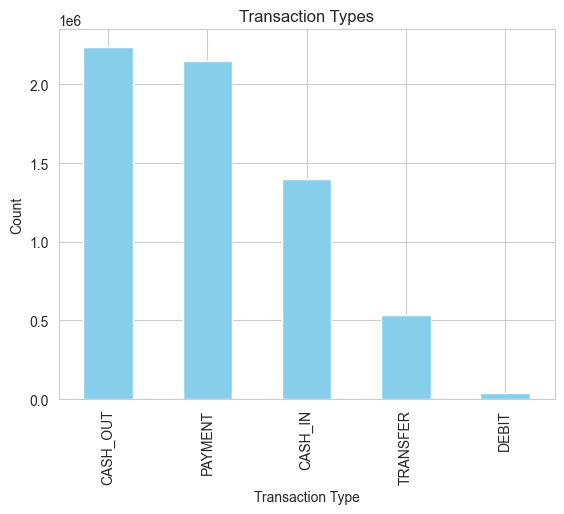

In [77]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types",color="skyblue") #creates a bar plot showing the count of each unique transaction type in the "type" column of the DataFrame df, with the bars colored sky blue and the title "Transaction Types".
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

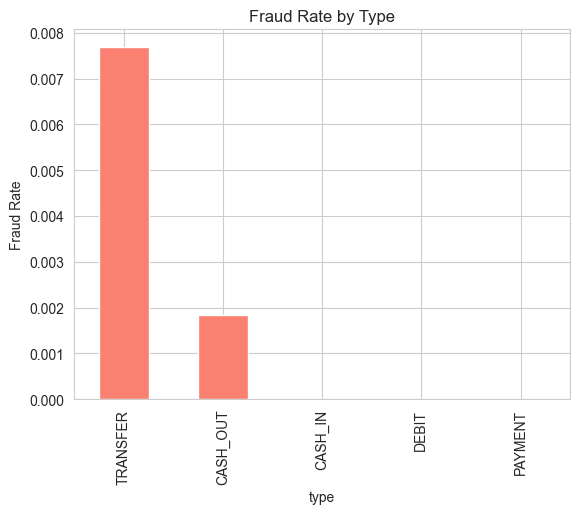

In [ ]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False) #groups the DataFrame df by the "type" column, calculates the mean of the "isFraud" column for each transaction type to determine the average fraud rate, and then sorts these values in descending order to identify which transaction types have higher fraud rates. The resulting Series is stored in the variable fraud_by_type.

fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon") #fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon") creates a bar plot showing the average fraud rate for each transaction type, with the bars colored salmon and the title "Fraud Rate by Type". The fraud rate is calculated as the mean of the "isFraud" column for each transaction type, and the values are sorted in descending order to highlight the types with higher fraud rates.

plt.ylabel("Fraud Rate") #Because pandas automatically sets the axis label using the column/index name when you plot a Series or DataFrame.

plt.show() #Fraud probability for each transaction type

i. df.groupby("type"): You are grouping the dataset based on transaction type.

ii. ["isFraud"]: You are selecting only the fraud column. isFraud contains: 1 → Fraud transaction, 0 → Genuine   transaction

iii. .mean(): Taking mean of a 0/1 column = probability (percentage) of fraud. Because:
                        
                        Mean = (Number of 1s/Total Rows)

So it becomes:Fraud Rate for each type

So mean = fraud probability

iv. .sort_values(ascending=False): Sorts transaction types from most dangerous → least dangerous

v. fraud_by_type tells: Which transaction types are most likely to be fraud

vi.   Axis	         Taken from

      X-label	        index name → type

      Y-label	        series values (no label unless set)

    Title	        only if provided

In [79]:
fraud_by_type #displays the Series fraud_by_type, which contains the average fraud rates for each transaction type, sorted in descending order. This allows us to see which transaction types have higher or lower fraud rates based on the mean of the "isFraud" column for each type.

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [80]:
df["amount"].describe().astype(int) #calculates and displays summary statistics for the "amount" column in the DataFrame df, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. The results are converted to integers for easier interpretation.

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

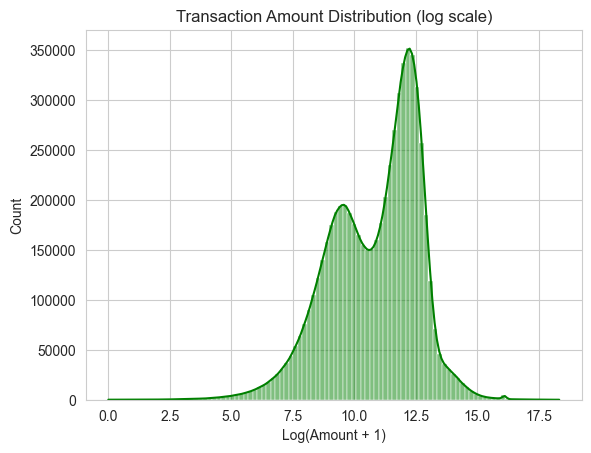

In [ ]:
sns.histplot(np.log1p(df["amount"]),bins=100,kde= True, color= "green") #creates a histogram of the logarithmically transformed "amount" column from the DataFrame df, using 100 bins and overlaying a kernel density estimate (KDE) to visualize the distribution of transaction amounts. The color of the histogram bars is set to green.
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")   
plt.show()

#sns.histplot() automatically assigns the Y-axis label based on what the plot represents. A histogram shows frequency (count of observations) in each bin.
#Why seaborn chooses "Count"

'''Because default parameter is:

stat="count"

So histogram shows raw frequency.'''

i. np.log1p(df["amount"]) : This is the most important part. 
                              
                               log1p(𝑥) = log(1+𝑥)
WHY we do this (VERY IMPORTANT)

Without log:

a. Most transactions small

b. Few extremely large

c. Graph looks like a vertical spike

Model learns poorly.

With log:

a. Compresses large values

b. Expands small values

c. Makes pattern visible

We use log transform to compress large values. This is mandatory preprocessing in fraud detection

ii. sns.histplot(...) : Draws histogram = frequency distribution.

iii. bins=100 : More bins = more detailed distribution.

iv. kde=True : Adds smooth curve (Kernel Density Estimate)

    This shows the true shape of distribution instead of blocky bars.

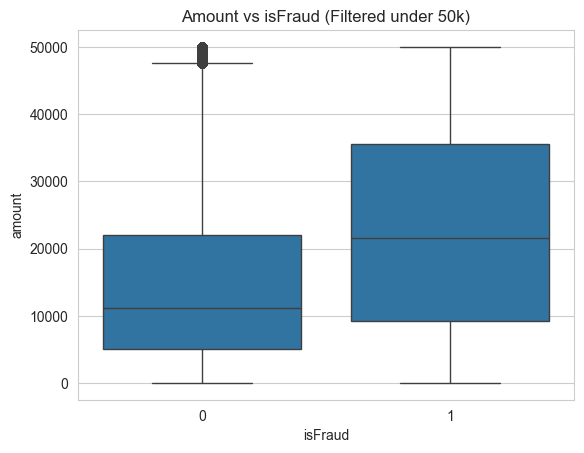

In [82]:
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y = "amount") #creates a box plot to visualize the distribution of transaction amounts for fraudulent and non-fraudulent transactions in the DataFrame df, filtering out transactions with amounts greater than or equal to 50,000 to focus on typical transaction values. The x-axis represents the "isFraud" column (0 for non-fraudulent, 1 for fraudulent), and the y-axis represents the "amount" column.
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

1) Filter very large amounts

df[df["amount"] < 50000]

WHY we do this

Bank datasets contain huge values (lakhs / crores).
Those extreme values stretch the graph → you can’t see real pattern.
So we zoom into common transactions (< 50k).

In [83]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["balanceDiffOrig"]= df["oldbalanceOrg"]-df["newbalanceOrig"] #How much money left the sender account

df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"] #How much money entered the receiver account

In [ ]:
(df["balanceDiffOrig"] < 0).sum() #calculates the number of transactions where the balance difference for the origin account (balanceDiffOrig) is negative, which indicates that the new balance is less than the old balance, suggesting a potential withdrawal or transfer out of funds.

'''Counts transactions where:

newbalanceOrig > oldbalanceOrg

Which should be impossible 

So this finds inconsistent bank records / suspicious behavior'''

np.int64(1399253)

In [ ]:
(df["balanceDiffDest"] < 0).sum() #calculates the number of transactions where the balance difference for the destination account (balanceDiffDest) is negative, which indicates that the new balance is less than the old balance, suggesting a potential withdrawal or transfer out of funds to the destination account.

'''Checks if receiver lost money after receiving → also suspicious.'''

np.int64(1238864)

In [87]:
df.head(2)#displays the first two rows of the DataFrame df, allowing us to see the newly created columns "balanceDiffOrig" and "balanceDiffDest" along with the original data for a quick verification of the calculations.

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


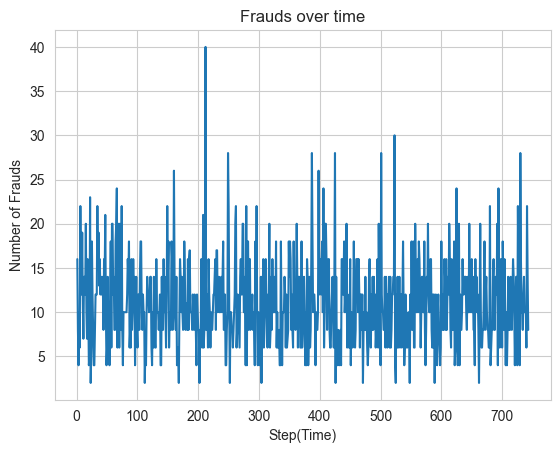

In [88]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index() #filters the DataFrame df to include only rows where the "isFraud" column is equal to 1 (indicating fraudulent transactions), then counts the occurrences of each unique value in the "step" column for these fraudulent transactions, and finally sorts the counts by the step index to analyze the distribution of fraud occurrences across different steps in the transaction process.
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per Step") #creates a line plot with the index of frauds_per_step (representing the steps) on the x-axis and the corresponding values (number of frauds) on the y-axis, labeling the line as "Frauds per Step" for clarity.
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over time")
plt.grid(True) #adds a grid to the plot for better readability of the data points.
plt.show()

What This Graph Reveals (Very Important Insight)

In this dataset typically:

Fraud spikes at specific hours

Mostly happens in batches

Often during low-activity banking hours

Because criminals prefer:

less monitoring

delayed human response

automated transfers

So fraud is not random
It is scheduled behaviour

Why This Matters for ML

You just discovered a hidden feature:

Fraud depends on TIME

So later you can create:

night_transaction
late_hour_flag
fraud_peak_period

These dramatically improve model accuracy.

Banks actually use this in real life — called temporal fraud detection.

In [89]:
df.drop(columns="step",inplace= True) #removes the "step" column from the DataFrame df in place, meaning that the original DataFrame is modified directly without creating a new one. This is often done to reduce dimensionality or remove irrelevant features before further analysis or modeling.

Why Are We Removing step ?

Earlier we plotted frauds over time — that was for human understanding.

But for machine learning:

    Problem	                         Why bad for model

  Step is sequential	          model memorizes timeline

  Future prediction fails	       data leakage

  Model overfits	             thinks specific hour = always fraud

Example:

If fraud happened at step 350 in training,
model may wrongly think:

“Whenever step=350 → fraud”

But in real life tomorrow’s fraud won’t happen at the same hour.

So we remove time index to prevent cheating.

This is called data leakage prevention

In [90]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [91]:
top_senders = df["nameOrig"].value_counts().head(10) #calculates the count of each unique value in the "nameOrig" column of the DataFrame df, which represents the origin account names. It then selects the top 10 most frequent origin account names and stores them in the variable top_senders for further analysis or visualization.

In [92]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

i.e These accounts made 3 transactions per day


In [93]:
top_receivers = df["nameDest"].value_counts().head(10) #calculates the count of each unique value in the "nameDest" column of the DataFrame df, which represents the destination account names. It then selects the top 10 most frequent destination account names and stores them in the variable top_receivers for further analysis or visualization.

In [ ]:
top_receivers #Counts how many transcations each receiver account got

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [95]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10) #filters the DataFrame df to include only rows where the "isFraud" column is equal to 1 (indicating fraudulent transactions), then counts the occurrences of each unique value in the "nameOrig" column for these fraudulent transactions, and finally selects the top 10 most frequent origin account names involved in fraudulent transactions, storing them in the variable fraud_users for further analysis or visualization.
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [96]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])] #filters the DataFrame df to include only rows where the "type" column has values that are either "TRANSFER" or "CASH_OUT". The resulting filtered DataFrame is stored in the variable fraud_types for further analysis, focusing on these specific transaction types which may be more relevant for fraud detection.
fraud_types["type"].value_counts() #counts the occurrences of each unique value in the "type" column of the fraud_types DataFrame, which contains only transactions of type "TRANSFER" and "CASH_OUT". This helps to understand the distribution of these two transaction types within the filtered dataset.

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

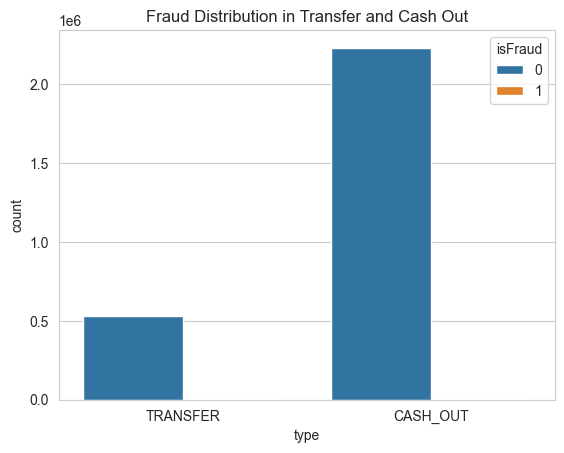

In [97]:
sns.countplot(data=fraud_types,x="type",hue="isFraud") #creates a count plot using seaborn to visualize the distribution of transaction types ("TRANSFER" and "CASH_OUT") in the fraud_types DataFrame, with the x-axis representing the transaction types and the hue differentiating between fraudulent (isFraud=1) and non-fraudulent (isFraud=0) transactions. This allows for a clear comparison of how many transactions of each type are fraudulent versus non-fraudulent.
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()

In [98]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr() #calculates the correlation matrix for the specified columns in the DataFrame df, which includes "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", and "isFraud". The resulting correlation matrix is stored in the variable corr for further analysis of the relationships between these variables.
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


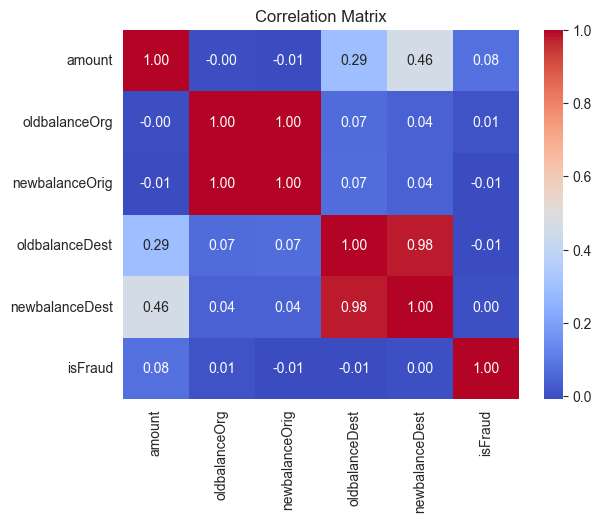

In [99]:
sns.heatmap(corr, annot=True , cmap= "coolwarm", fmt=".2f") #creates a heatmap using seaborn to visualize the correlation matrix stored in corr, with annotations showing the correlation coefficients formatted to two decimal places. The color map used is "coolwarm", which helps to distinguish between positive and negative correlations effectively.
plt.title("Correlation Matrix")
plt.show()

i. sns.heatmap(corr) : Creates a color map table

ii. annot=True : Shows the actual numbers inside each box.

iii. cmap="coolwarm" : Chooses color scheme:

Color	            Meaning
Red	               Positive correlation
Blue	           Negative correlation
White	           Near zero

iv. fmt=".2f" : Formats numbers to 2 decimal places

In [100]:
zero_after_transfer = df[
        (df["oldbalanceOrg"] > 0) &
        (df["newbalanceOrig"]==0) &
        (df["type"].isin(["TRANSFER",'CASH_OUT']))
        ]  #filters the DataFrame df to include only rows where the "oldbalanceOrg" column is greater than 0, the "newbalanceOrig" column is equal to 0, and the "type" column has values that are either "TRANSFER" or "CASH_OUT". The resulting filtered DataFrame is stored in the variable zero_after_transfer for further analysis, which may indicate transactions where the origin account balance drops to zero after a transfer or cash out, potentially signaling fraudulent activity.

In [101]:
len(zero_after_transfer) #calculates the number of transactions in the zero_after_transfer DataFrame, which contains transactions where the original balance was greater than 0, the new balance is 0, and the transaction type is either "TRANSFER" or "CASH_OUT". This can help identify cases where funds were completely withdrawn or transferred out, which may be indicative of fraudulent activity.

1188074

In [102]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [103]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split #imports the train_test_split function from the scikit-learn library, which is used to split a dataset into training and testing subsets for machine learning tasks.

from sklearn.preprocessing import StandardScaler #imports the StandardScaler class from scikit-learn, which is used to standardize features by removing the mean and scaling to unit variance. This is often done to improve the performance of machine learning algorithms by ensuring that all features are on a similar scale.

from sklearn.linear_model import LogisticRegression #imports the LogisticRegression class from scikit-learn, which is a machine learning algorithm used for classification tasks. It models the relationship between a dependent variable (target) and one or more independent variables (features) by estimating probabilities using a logistic function.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #imports the classification_report, confusion_matrix, and accuracy_score functions from scikit-learn's metrics module. These functions are used to evaluate the performance of a classification model by providing detailed metrics such as precision, recall, F1-score (classification_report), a matrix showing true vs predicted classifications (confusion_matrix), and the overall accuracy of the model (accuracy_score).

from sklearn.pipeline import Pipeline #imports the Pipeline class from scikit-learn, which allows for chaining multiple processing steps together into a single object. This is useful for creating a streamlined workflow for data preprocessing and model training, ensuring that all steps are executed in the correct order and making it easier to manage complex machine learning pipelines.

from sklearn.compose import ColumnTransformer #imports the ColumnTransformer class from scikit-learn, which allows for applying different preprocessing steps to specific columns in a dataset. This is particularly useful when dealing with datasets that contain both numerical and categorical features, as it enables the application of appropriate transformations to each type of feature within a single pipeline.

from sklearn.preprocessing import OneHotEncoder #imports the OneHotEncoder class from scikit-learn, which is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve their performance. It creates binary columns for each category in the specified categorical features.

In [105]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [106]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"],axis=1) #creates a new DataFrame df_model by dropping the columns "nameOrig", "nameDest", and "isFlaggedFraud" from the original DataFrame df. This is often done to remove irrelevant or sensitive information before building a machine learning model, as these columns may not contribute to the predictive power of the model or may contain personally identifiable information.
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [107]:
categorical = ["type"] #defines a list named categorical that contains the name of the categorical feature "type". This list will be used later for preprocessing steps in a machine learning pipeline to identify which features require encoding or other transformations specific to categorical data.
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"] #defines two lists: categorical, which contains the name of the categorical feature "type", and numeric, which contains the names of the numerical features "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", and "newbalanceDest". These lists will be used later for preprocessing steps in a machine learning pipeline.


In [108]:
y=df_model["isFraud"] #assigns the "isFraud" column from the DataFrame df_model to the variable y, which will serve as the target variable for a machine learning model.
x=df_model.drop("isFraud", axis=1) #creates a new DataFrame x by dropping the "isFraud" column from df_model. This means that x will contain all the features (independent variables) that will be used to predict the target variable y (which is "isFraud"). This separation of features and target is a common step in preparing data for machine learning models.

In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.3, stratify=y) #splits the dataset into training and testing subsets using the train_test_split function from scikit-learn. The features (x) and target variable (y) are divided into xtrain, xtest, ytrain, and ytest. The test_size parameter is set to 0.3, meaning that 30% of the data will be used for testing, while the remaining 70% will be used for training. The stratify parameter is set to y, which ensures that the proportion of classes in the target variable is maintained in both the training and testing sets, helping to prevent class imbalance issues during model evaluation.


In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num" , StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical)
    ] , 
    remainder = "drop"
) #creates a ColumnTransformer object named preprocessor that defines two types of transformations: numerical features (numeric) will be standardized using StandardScaler, and categorical features (categorical) will be encoded using OneHotEncoder with the first category dropped to avoid multicollinearity. The remainder parameter is set to "drop", meaning that any columns not specified in the transformers list will be dropped from the output. This preprocessor will be used in a machine learning pipeline to ensure that the appropriate transformations are applied to the respective feature types before model training.

In [111]:
pipeline = Pipeline([
    ("prep" , preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter = 1000))
    ]) #creates a machine learning pipeline using scikit-learn's Pipeline class. The pipeline consists of two steps: "prep", which applies the preprocessor defined earlier to handle both numerical and categorical features, and "clf", which fits a LogisticRegression model with balanced class weights to address class imbalance and a maximum of 1000 iterations for convergence. This pipeline streamlines the process of data preprocessing and model training in a single object.

In [112]:
pipeline.fit(xtrain,ytrain) #fits the machine learning pipeline to the training data (xtrain and ytrain). This involves applying the preprocessing steps defined in the preprocessor to the training features and then training the LogisticRegression model on the transformed data.

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

In [113]:
ypred = pipeline.predict(xtest) #uses the fitted machine learning pipeline to make predictions on the test features (xtest), storing the predicted class labels in the variable ypred for further evaluation of the model's performance.

In [114]:
print(classification_report (ytest,ypred)) #prints a classification report that evaluates the performance of the model by comparing the true labels (ytest) with the predicted labels (ypred). The report includes metrics such as precision, recall, F1-score, and support for each class, providing insights into how well the model is performing in terms of correctly identifying fraudulent and non-fraudulent transactions.

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [115]:
confusion_matrix(ytest,ypred) #calculates and returns the confusion matrix for the true labels (ytest) and predicted labels (ypred). The confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.

array([[1806331,   99991],
       [    149,    2315]])

In [116]:
pipeline.score(xtest,ytest) #calculates the mean accuracy of the fitted machine learning pipeline on the test data (xtest and ytest). This method returns the proportion of correctly classified samples in the test set, providing an overall measure of the model's performance.

0.9475373352486869

In [117]:
import joblib #imports the joblib library, which is used for saving and loading Python objects, such as machine learning models, to and from disk.

joblib.dump(pipeline , "fraud_detection_pipeline.pkl") #saves the fitted machine learning pipeline object to a file named "fraud_detection_pipeline.pkl" using joblib. This allows for later reuse of the trained model without needing to retrain it, enabling efficient deployment or further analysis.

['fraud_detection_pipeline.pkl']